In [94]:
import sys
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [96]:
# Accident information from https://data.go.th/th/dataset/rtddi
df_accident = pd.read_excel('/content/drive/MyDrive/kh-muulphuuesiiychiiwitcchaak-ubatiehtuthaangthnn-cchaakrabbbuurnaakaarkh-muulkaartaaycchaak-ubatiehtuthaangthnn-pii-54-63.xlsx')

df_accident_1 = df_accident[(df_accident['DEAD_YEAR'] >= 2018) & (df_accident['DEAD_YEAR'] <= 2021)][ ['id','DEAD_YEAR','DeadDate','AccProv'] ] 
df_accident_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66467 entries, 3664 to 213187
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         66467 non-null  int64         
 1   DEAD_YEAR  66467 non-null  int64         
 2   DeadDate   66467 non-null  datetime64[ns]
 3   AccProv    66466 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.5+ MB


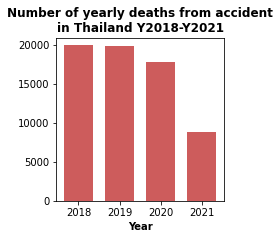

In [97]:
df_accident_1_year = df_accident_1.groupby(['DEAD_YEAR'])['id'].count().to_frame().reset_index()
fig = plt.figure(figsize = (3, 3))
plt.bar(df_accident_1_year['DEAD_YEAR'], df_accident_1_year['id'], color ='indianred',width = 0.7)
plt.xlabel("Year", weight='bold')
plt.title("Number of yearly deaths from accident\nin Thailand Y2018-Y2021", weight='bold')
plt.show()

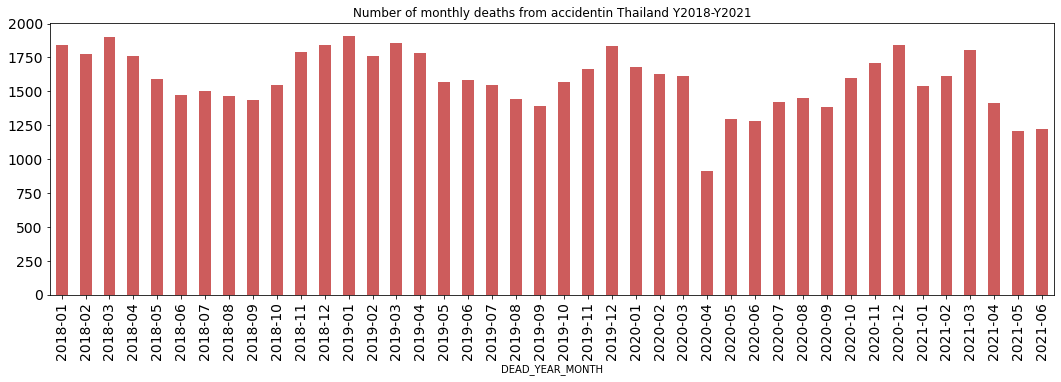

In [98]:
df_accident_1['DEAD_YEAR_MONTH'] = df_accident_1['DeadDate'].dt.strftime('%Y-%m')
df_accident_1['DEAD_MONTH'] = df_accident_1['DeadDate'].dt.strftime('%m')
df_accident_1['DEAD_YEAR_MONTH'] = df_accident_1['DeadDate'].dt.strftime('%Y-%m')
df_accident_1_yearmonth = df_accident_1.groupby(['DEAD_YEAR_MONTH'])['id'].count()
df_accident_1_yearmonth = df_accident_1_yearmonth.plot(kind='bar',title='Number of monthly deaths from accidentin Thailand Y2018-Y2021',
                                                       color = 'indianred', figsize=(18,5), fontsize=14)

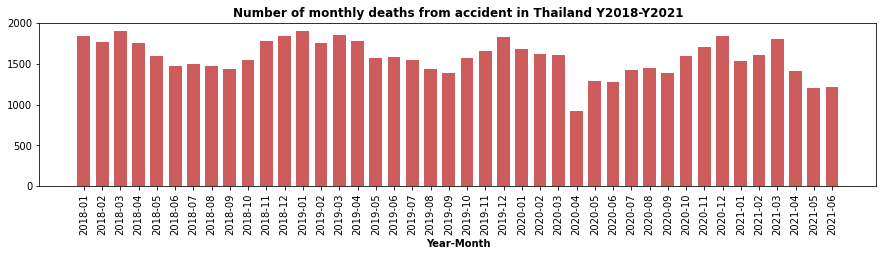

In [99]:
df_accident_1['DEAD_YEAR_MONTH'] = df_accident_1['DeadDate'].dt.strftime('%Y-%m')
df_accident_1['DEAD_MONTH'] = df_accident_1['DeadDate'].dt.strftime('%m')
df_accident_1['DEAD_YEAR_MONTH'] = df_accident_1['DeadDate'].dt.strftime('%Y-%m')
df_accident_1_yearmonth = df_accident_1.groupby(['DEAD_YEAR_MONTH'])['id'].count().to_frame().reset_index()
fig = plt.figure(figsize = (15, 3))

plt.bar(df_accident_1_yearmonth['DEAD_YEAR_MONTH'], df_accident_1_yearmonth['id'], color ='indianred',width = 0.7)
plt.xlabel("Year-Month", weight='bold')
plt.xticks(rotation=90)
plt.title("Number of monthly deaths from accident in Thailand Y2018-Y2021", weight='bold')
plt.show()

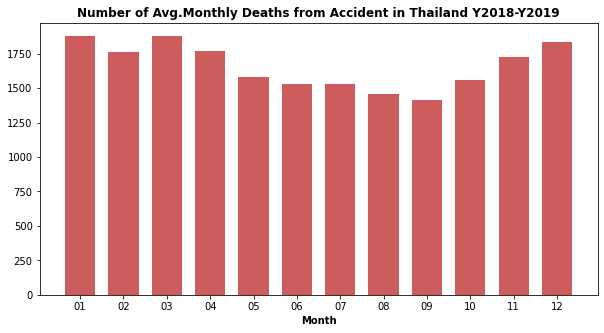

March : Maximum avg. monthly deaths from accident in Thailand.
September : Minimum avg. monthly deaths from accident in Thailand.


In [100]:
df_accident_2 = df_accident_1[(df_accident_1['DEAD_YEAR'] >= 2018) & 
                            (df_accident_1['DEAD_YEAR'] <= 2019)][ ['id','DEAD_YEAR','DEAD_YEAR_MONTH','DEAD_MONTH','DeadDate','AccProv'] ] 

df_accident_2_month = df_accident_2.groupby(['DEAD_MONTH'])['id'].count().to_frame().reset_index()
df_accident_2_month['AVG_MONTHLY_ACCIDENT'] = (df_accident_2_month['id']/2).round()

fig = plt.figure(figsize = (10, 5))
plt.bar(df_accident_2_month['DEAD_MONTH'], df_accident_2_month['AVG_MONTHLY_ACCIDENT'], color ='indianred',width = 0.7)

plt.xlabel("Month", weight='bold')
plt.title("Number of Avg.Monthly Deaths from Accident in Thailand Y2018-Y2019", weight='bold')
#plt.grid()
plt.show()
print(f'March : Maximum avg. monthly deaths from accident in Thailand.')
print(f'September : Minimum avg. monthly deaths from accident in Thailand.')

In [101]:
df_accident_1_pivot = pd.pivot_table(df_accident_1, values='id', index='AccProv', columns='DEAD_YEAR',aggfunc='count')
df_accident_1_pivot

DEAD_YEAR,2018,2019,2020,2021
AccProv,,,,
กระบี่,164,163,122,45
กรุงเทพมหานคร,837,893,828,399
กาญจนบุรี,307,285,269,127
กาฬสินธุ์,284,228,229,135
กำแพงเพชร,198,235,214,102
...,...,...,...,...
เพชรบุรี,199,145,155,79
เพชรบูรณ์,350,372,299,161
เลย,232,205,204,93


In [102]:
# Yearly Thai Population in each province from http://statbbi.nso.go.th/staticreport/page/sector/th/01.aspx
df_population = pd.read_excel('/content/drive/MyDrive/sector_01_11102_TH_.xlsx',sheet_name = 'ข้อมูล')
df_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2132 entries, 0 to 2131
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ภาค             2132 non-null   object
 1   จังหวัด         2132 non-null   object
 2   กลุ่มอายุ (ปี)  2132 non-null   object
 3   2555            2132 non-null   int64 
 4   2556            2132 non-null   int64 
 5   2557            2132 non-null   int64 
 6   2558            2132 non-null   int64 
 7   2559            2132 non-null   int64 
 8   2560            2132 non-null   int64 
 9   2561            2132 non-null   int64 
 10  2562            2132 non-null   int64 
 11  2563            2132 non-null   int64 
 12  2564            2132 non-null   int64 
dtypes: int64(10), object(3)
memory usage: 216.7+ KB


In [103]:
df_population_1 = df_population[(df_population['กลุ่มอายุ (ปี)'] == 'รวม') & 
                                (df_population['จังหวัด'] != 'ทั่วราชอาณาจักร') &
                                (df_population['จังหวัด'] != 'ภาคกลาง') &
                                (df_population['จังหวัด'] != 'ภาคเหนือ') &
                                (df_population['จังหวัด'] != 'ภาคตะวันออกเฉียงเหนือ') & 
                                (df_population['จังหวัด'] != 'ภาคใต้')][ ['จังหวัด',2561,2562,2563,2564] ] 
df_population_1.rename({'จังหวัด': 'PROVINCE_TH', 2561: 'POPULATION_Y2018', 2562: 'POPULATION_Y2019', 
                          2563: 'POPULATION_Y2020', 2564: 'POPULATION_Y2021'}, axis=1, inplace=True)
df_population_1

,PROVINCE_TH,POPULATION_Y2018,POPULATION_Y2019,POPULATION_Y2020,POPULATION_Y2021
26,กรุงเทพมหานคร,5676648,5666264,5588222,5527994
78,สมุทรปราการ,1326608,1344875,1351479,1356449
104,นนทบุรี,1246295,1265387,1276745,1288637
130,ปทุมธานี,1146092,1163604,1176412,1190060
156,พระนครศรีอยุธยา,817441,820188,819088,820512
...,...,...,...,...,...
2002,ตรัง,643116,643164,640574,639788
2028,พัทลุง,525044,524865,523077,522541
2054,ปัตตานี,718077,725104,726015,729581
2080,ยะลา,532326,536330,538602,542314


In [104]:
#df_mapping = pd.read_csv('/content/drive/MyDrive/province_mapping.csv')
#df_mapping.info()

In [105]:
# Mapping TH province to ENG province from https://www.enghero.com/article/%E0%B8%88%E0%B8%B1%E0%B8%87%E0%B8%AB%E0%B8%A7%E0%B8%B1%E0%B8%94%E0%B9%83%E0%B8%99%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B9%80%E0%B8%97%E0%B8%A8%E0%B9%84%E0%B8%97%E0%B8%A2-%E0%B8%A0%E0%B8%B2%E0%B8%A9%E0%B8%B2%E0%B8%AD%E0%B8%B1%E0%B8%87%E0%B8%81%E0%B8%A4%E0%B8%A9
df_mapping = pd.read_csv('/content/drive/MyDrive/province_mapping.csv',encoding = "TIS-620")
df_mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   จังหวัดภาษาไทย     77 non-null     object
 1   จังหวัดภาษาอังกฤษ  77 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [106]:
df_mapping['จังหวัดภาษาไทย'] = df_mapping['จังหวัดภาษาไทย'].str.replace('จังหวัด','')
df_mapping['จังหวัดภาษาอังกฤษ'] = df_mapping['จังหวัดภาษาอังกฤษ'].str.replace(' Province','')
df_mapping.rename({'จังหวัดภาษาไทย': 'PROVINCE_TH','จังหวัดภาษาอังกฤษ': 'PROVINCE_ENG'}, axis=1, inplace=True)
df_mapping

,PROVINCE_TH,PROVINCE_ENG
0,กรุงเทพมหานคร,Krung Thep Maha Nakhon (Bangkok)
1,กระบี่,Krabi
2,กาญจนบุรี,Kanchanaburi
3,กาฬสินธุ์,Kalasin
4,กำแพงเพชร,Kamphaeng Phet
...,...,...
72,อำนาจเจริญ,Amnat Charoen
73,อุดรธานี,Udon Thani
74,อุตรดิตถ์,Uttaradit
75,อุทัยธานี,Uthai Thani


In [107]:
df_final = pd.merge( df_accident_1_pivot, df_population_1, left_on='AccProv', right_on='PROVINCE_TH')
df_final.rename({2018: 'ACCIDENT_Y2018', 2019: 'ACCIDENT_Y2019'}, axis=1, inplace=True)
df_final = pd.merge( df_final, df_mapping, left_on='PROVINCE_TH', right_on='PROVINCE_TH')
df_final = df_final[['PROVINCE_TH','ACCIDENT_Y2018','ACCIDENT_Y2019',
          'POPULATION_Y2018','POPULATION_Y2019','PROVINCE_ENG']]
df_final['PERCENTAGE_GROWTH'] = (df_final['ACCIDENT_Y2019']-df_final['ACCIDENT_Y2018'])*100/df_final['ACCIDENT_Y2018']
df_final['ACCIDENT_PROPORTION_Y2019'] = df_final['ACCIDENT_Y2019']*100/df_final['POPULATION_Y2019']
df_final

,PROVINCE_TH,ACCIDENT_Y2018,ACCIDENT_Y2019,POPULATION_Y2018,POPULATION_Y2019,PROVINCE_ENG,PERCENTAGE_GROWTH,ACCIDENT_PROPORTION_Y2019
0,กระบี่,164,163,473738,476739,Krabi,-0.609756,0.034191
1,กรุงเทพมหานคร,837,893,5676648,5666264,Krung Thep Maha Nakhon (Bangkok),6.690562,0.015760
2,กาญจนบุรี,307,285,893151,895525,Kanchanaburi,-7.166124,0.031825
3,กาฬสินธุ์,284,228,985346,983418,Kalasin,-19.718310,0.023184
4,กำแพงเพชร,198,235,727807,725867,Kamphaeng Phet,18.686869,0.032375
...,...,...,...,...,...,...,...,...
72,เพชรบุรี,199,145,484294,485191,Phetchaburi,-27.135678,0.029885
73,เพชรบูรณ์,350,372,994540,992451,Phetchabun,6.285714,0.037483
74,เลย,232,205,642773,642950,Loei,-11.637931,0.031884
75,แพร่,163,138,445090,441726,Phrae,-15.337423,0.031241


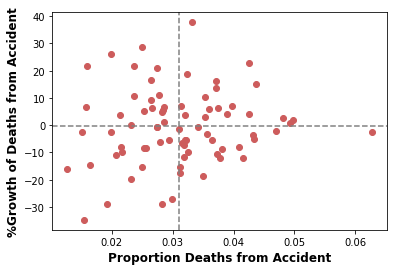

<Figure size 1300x600 with 0 Axes>

Mean of Accident proportion Y2019: 0.03
Mean of %Growth: -0.49


In [108]:
ACCIDENT_PROPORTION_Y2019_MEAN = df_final['ACCIDENT_PROPORTION_Y2019'].mean()
PERCENTAGE_GROWTH_MEAN = df_final['PERCENTAGE_GROWTH'].mean()
plt.scatter(df_final['ACCIDENT_PROPORTION_Y2019'], df_final['PERCENTAGE_GROWTH'], color = 'indianred')
plt.xlabel('Proportion Deaths from Accident', fontsize=12, weight='bold')
plt.ylabel('%Growth of Deaths from Accident', fontsize=12, weight='bold')
plt.axvline(ACCIDENT_PROPORTION_Y2019_MEAN, c='gray', ls='--')
plt.axhline(PERCENTAGE_GROWTH_MEAN, c='gray', ls='--')
plt.figure(figsize=(13, 6), dpi = 100)
plt.show()

print(f'Mean of Accident proportion Y2019: {ACCIDENT_PROPORTION_Y2019_MEAN:.2f}')
print(f'Mean of %Growth: {PERCENTAGE_GROWTH_MEAN:.2f}')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3585 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3635 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3649 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3614 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3591 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 3648 missing from current font.
  font.set_text(s

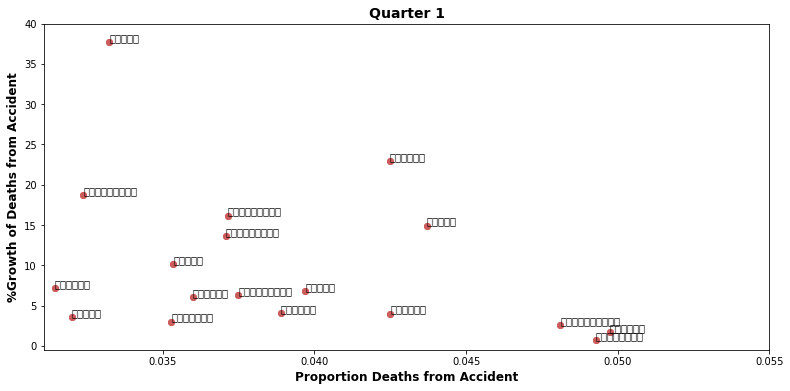

In [109]:
df_final_q1 =  df_final[(df_final['ACCIDENT_PROPORTION_Y2019'] >= ACCIDENT_PROPORTION_Y2019_MEAN) &
                        (df_final['PERCENTAGE_GROWTH'] >= PERCENTAGE_GROWTH_MEAN)]
plt.scatter(df_final_q1['ACCIDENT_PROPORTION_Y2019'], df_final_q1['PERCENTAGE_GROWTH'], color = 'indianred')

x = df_final_q1['ACCIDENT_PROPORTION_Y2019'].tolist()
y = df_final_q1['PERCENTAGE_GROWTH'].tolist()
text = df_final_q1['PROVINCE_TH'].tolist()

plt.scatter(x, y, color = 'indianred')
  
# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2))
  
# adjusting the scale of the axes
plt.xlim((ACCIDENT_PROPORTION_Y2019_MEAN, 0.055))
plt.ylim((PERCENTAGE_GROWTH_MEAN, 40))
plt.title('Quarter 1', fontsize=14, weight='bold')
plt.xlabel('Proportion Deaths from Accident', fontsize=12, weight='bold')
plt.ylabel('%Growth of Deaths from Accident', fontsize=12, weight='bold')
plt.gcf().set_size_inches(13, 6)
plt.show()

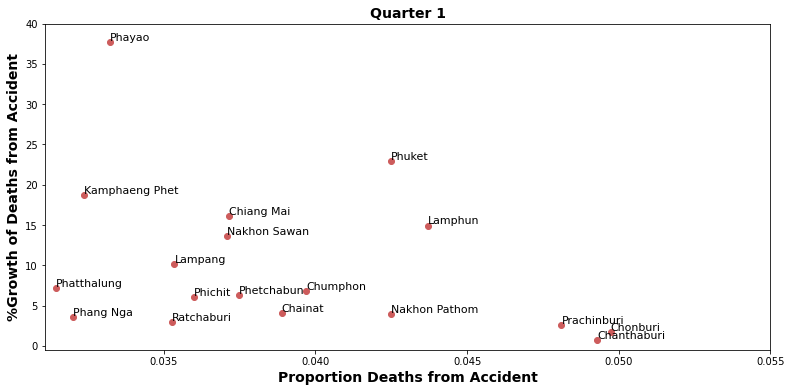

In [110]:
df_final_q1 =  df_final[(df_final['ACCIDENT_PROPORTION_Y2019'] >= ACCIDENT_PROPORTION_Y2019_MEAN) &
                        (df_final['PERCENTAGE_GROWTH'] >= PERCENTAGE_GROWTH_MEAN)]

x = df_final_q1['ACCIDENT_PROPORTION_Y2019'].tolist()
y = df_final_q1['PERCENTAGE_GROWTH'].tolist()
text = df_final_q1['PROVINCE_ENG'].tolist()

plt.scatter(x, y, color = 'indianred')
plt.title('Quarter 1', fontsize=14, weight='bold')
plt.xlabel('Proportion Deaths from Accident', fontsize=14, weight='bold')
plt.ylabel('%Growth of Deaths from Accident', fontsize=14, weight='bold')

# Loop for annotation of all points
for i in range(len(x)):
    plt.annotate(text[i], (x[i], y[i] + 0.2),fontsize=11)
  
# adjusting the scale of the axes
plt.xlim((ACCIDENT_PROPORTION_Y2019_MEAN, 0.055))
plt.ylim((PERCENTAGE_GROWTH_MEAN, 40))
plt.gcf().set_size_inches(13, 6)
plt.show()